In [35]:
import pickle
import os
import glob
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import torchvision.transforms.v2 as T
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.nn import functional as F
from torchvision.transforms import Resize
from PIL import Image
from torchmetrics import Accuracy
import matplotlib.pyplot as plt

In [2]:
mapa = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

In [3]:
transform_train = T.Compose([
    T.RandomHorizontalFlip(p = 0.5),
    T.ToDtype(torch.float32, scale = True),
])

In [4]:
transform_test = T.Compose([
    T.ToDtype(torch.float32, scale = True),
])

In [5]:
class cifar(Dataset):
    def __init__(self):
        self.X = []
        self.y = []
    
    def load_cifar(self, path):
        for i, file in enumerate(os.listdir('./' + path)):
            file = os.getcwd() + path + file
            with open(file, 'rb') as f:
                dict = pickle.load(f, encoding = 'latin1')
                images = []
                for image in dict['data']:
                    images.append(image.reshape(3, 32, 32))
                for label in dict['labels']:
                    self.y.append(label)
                self.X.append(images)
                
    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return (self.X[idx], self.y[idx])

    def transform(self):
        new_X = []
        for i, batch in enumerate(self.X):
            for image in batch:
                new_image = image.reshape(3, 32, 32)
                new_image = torch.FloatTensor(new_image)
                new_image = transform_train(new_image).to(device)
                new_X.append(new_image)
            self.X = new_X
            
    def visualize(self, batch, idx):
        image = self.X[batch][idx]
        image = image.reshape(3, 32, 32)
        image = image.transpose(1, 2, 0)
        plt.imshow(image)

In [6]:
class test_cifar(Dataset):
    def __init__(self):
        self.X = []
        self.y = []
    
    def load_cifar(self, path):
        for i, file in enumerate(os.listdir('./' + path)):
            file = os.getcwd() + path + file
            with open(file, 'rb') as f:
                dict = pickle.load(f, encoding = 'latin1')
                images = []
                for image in dict['data']:
                    images.append(image.reshape(3, 32, 32))
                for label in dict['labels']:
                    self.y.append(label)
                self.X.append(images)
                
    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return (self.X[idx], self.y[idx])

    def transform(self):
        new_X = []
        for i, batch in enumerate(self.X):
            for image in batch:
                new_image = image.reshape(3, 32, 32)
                new_image = torch.FloatTensor(new_image)
                new_image = transform_test(new_image).to(device)
                new_X.append(new_image)
            self.X = new_X
            
    def visualize(self, batch, idx):
        image = self.X[batch][idx]
        image = image.reshape(3, 32, 32)
        image = image.transpose(1, 2, 0)
        plt.imshow(image)

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [8]:
device

'cuda'

In [9]:
cifar_test = cifar()
cifar_test.load_cifar('/cifar-10-batches-py/test/')
cifar_test.transform()

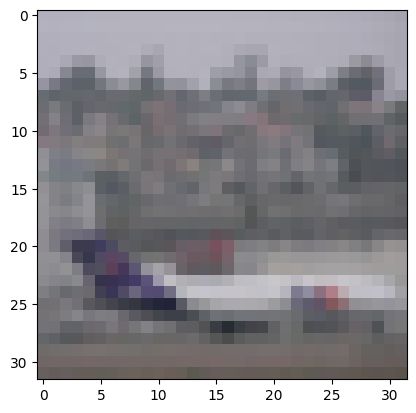

In [10]:
cifar_train = cifar()
cifar_train.load_cifar('/cifar-10-batches-py/data/')
print(cifar_train)
cifar_train.visualize(0, 0)

In [11]:
cifar_train.transform()

In [12]:
cifar_train.X

[tensor([[[178., 178., 178.,  ..., 170., 168., 165.],
          [180., 179., 180.,  ..., 173., 171., 168.],
          [177., 177., 178.,  ..., 171., 169., 167.],
          ...,
          [112., 113., 114.,  ..., 100.,  98., 101.],
          [112., 112., 113.,  ..., 102., 102., 102.],
          [103., 100., 103.,  ...,  92.,  93.,  91.]],
 
         [[176., 176., 176.,  ..., 168., 166., 163.],
          [178., 177., 178.,  ..., 171., 169., 166.],
          [175., 175., 176.,  ..., 169., 167., 165.],
          ...,
          [107., 109., 110.,  ...,  97.,  94.,  95.],
          [102., 103., 103.,  ...,  95.,  93.,  92.],
          [ 96.,  93.,  95.,  ...,  84.,  86.,  84.]],
 
         [[189., 189., 189.,  ..., 180., 177., 174.],
          [191., 190., 191.,  ..., 182., 180., 177.],
          [188., 188., 189.,  ..., 180., 178., 176.],
          ...,
          [107., 108., 110.,  ...,  94.,  93.,  95.],
          [101., 102., 103.,  ...,  93.,  91.,  91.],
          [ 92.,  90.,  94.,  .

In [13]:
cifar_train.X[0].shape

torch.Size([3, 32, 32])

In [14]:
cifar_train[0]

(tensor([[[178., 178., 178.,  ..., 170., 168., 165.],
          [180., 179., 180.,  ..., 173., 171., 168.],
          [177., 177., 178.,  ..., 171., 169., 167.],
          ...,
          [112., 113., 114.,  ..., 100.,  98., 101.],
          [112., 112., 113.,  ..., 102., 102., 102.],
          [103., 100., 103.,  ...,  92.,  93.,  91.]],
 
         [[176., 176., 176.,  ..., 168., 166., 163.],
          [178., 177., 178.,  ..., 171., 169., 166.],
          [175., 175., 176.,  ..., 169., 167., 165.],
          ...,
          [107., 109., 110.,  ...,  97.,  94.,  95.],
          [102., 103., 103.,  ...,  95.,  93.,  92.],
          [ 96.,  93.,  95.,  ...,  84.,  86.,  84.]],
 
         [[189., 189., 189.,  ..., 180., 177., 174.],
          [191., 190., 191.,  ..., 182., 180., 177.],
          [188., 188., 189.,  ..., 180., 178., 176.],
          ...,
          [107., 108., 110.,  ...,  94.,  93.,  95.],
          [101., 102., 103.,  ...,  93.,  91.,  91.],
          [ 92.,  90.,  94.,  .

In [15]:
train_loader = DataLoader(dataset = cifar_train, batch_size = 64, shuffle = True)
test_loader = DataLoader(dataset = cifar_test, batch_size = 64, shuffle = False)

In [16]:
class tinyVGG(nn.Module):
    def __init__(self, input_shape = 3, hidden_units = 10, output_shape = 10):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(input_shape, hidden_units, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_units * 8 * 8, output_shape)
        )

    def forward(self, X):
        z = self.conv_block_1(X)
        z = self.conv_block_2(z)
        return self.classifier(z)

In [17]:
model_0 = tinyVGG().to(device)

In [18]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model_0.parameters(), lr = 0.001)
acc = Accuracy(task = 'multiclass', num_classes = 10).to(device)

In [19]:
def train_step(model, train_loader, criterion, optimizer, acc, device):
    train_loss = 0
    accuracy = 0
    
    for batch in train_loader:
        X, y = batch
        X, y = X.to(device), y.to(device)
        preds = model(X)
        loss = criterion(preds, y)
        train_loss += loss.item()
        accuracy += acc(preds, y).item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(train_loader)
    accuracy /= len(train_loader)
    return (train_loss, accuracy)

In [20]:
def test_step(model, test_loader, criterion, acc, device):
    test_loss = 0
    accuracy = 0
    model.eval()
    with torch.inference_mode():
        for batch in test_loader:
            X, y = batch
            X, y = X.to(device), y.to(device)
            preds = model(X)
            test_loss += criterion(preds, y).item()
            accuracy += acc(preds, y).item()

    test_loss /= len(test_loader)
    accuracy /= len(test_loader)
    return (test_loss, accuracy)

In [21]:
def workflow(model, epochs, train_loader, test_loader, criterion, optimizer, acc, device):
    train_losses, train_accs = [], []
    test_losses, test_accs = [], []
    for epoch in range(epochs):
        train_loss, train_acc = train_step(model, train_loader, criterion, optimizer, acc, device)
        test_loss, test_acc = test_step(model, test_loader, criterion, acc, device)
        train_losses.append(train_loss), train_accs.append(train_acc)
        test_losses.append(test_loss), test_accs.append(test_acc)
    return train_losses, train_accs, test_losses, test_accs

In [22]:
train_losses, train_accs, test_losses, test_accs = workflow(model_0, 100, train_loader, test_loader, criterion, optimizer, acc, device) 

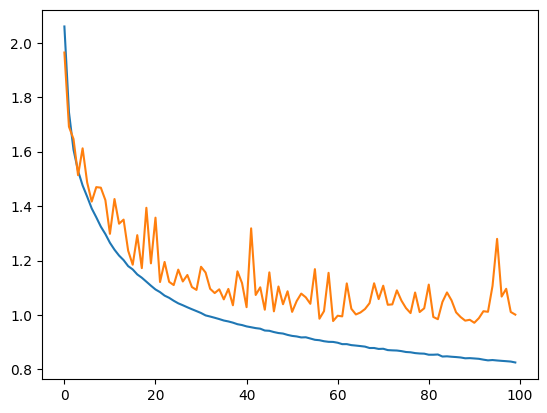

In [23]:
plt.plot(range(100), train_losses)
plt.plot(range(100), test_losses)

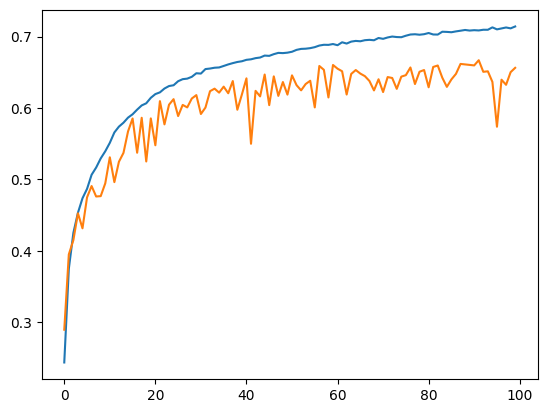

In [24]:
plt.plot(range(100), train_accs)
plt.plot(range(100), test_accs)

In [36]:
class Inception(nn.Module):
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        self.b1_1 = nn.LazyConv2d(c1, kernel_size = 1)
        self.b2_1 = nn.LazyConv2d(c2[0], kernel_size = 1)
        self.b2_2 = nn.LazyConv2d(c2[1], kernel_size = 3, padding = 1)
        self.b3_1 = nn.LazyConv2d(c3[0], kernel_size = 1)
        self.b3_2 = nn.LazyConv2d(c3[1], kernel_size = 5, padding = 2)
        self.b4_1 = nn.MaxPool2d(kernel_size = 3, stride = 1, padding = 1)
        self.b4_2 = nn.LazyConv2d(c4, kernel_size = 1)

    def forward(self, x):
        b1 = F.relu(self.b1_1(x))
        b2 = F.relu(self.b2_2(F.relu(self.b2_1(x))))
        b3 = F.relu(self.b3_2(F.relu(self.b3_1(x))))
        b4 = F.relu(self.b4_2(self.b4_1(x)))
        return torch.cat((b1, b2, b3, b4), dim = 1)


In [37]:
class GoogleNet(nn.Module):
    def __init__(self, lr = 0.1, num_classes = 10):
        super(GoogleNet, self).__init__()
        self.lr = lr
        self.num_classes = num_classes
        self.net = nn.Sequential(self.b1(), self.b2(), self.b3(), self.b4(), self.b5(), nn.LazyLinear(num_classes))

    def b1(self):
        return nn.Sequential(
        nn.LazyConv2d(64, kernel_size = 7, stride = 2, padding = 3),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 3, stride =2, padding = 1)
    )
  
    def b2(self):
        return nn.Sequential(
        nn.LazyConv2d(64, kernel_size = 1),
        nn.ReLU(),
        nn.LazyConv2d(192, kernel_size = 3, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)
    )

    def b3(self):
        return nn.Sequential(
            Inception(64, (96, 128), (16,32), 32),
            Inception(128, (128, 192), (32, 96), 64),
            nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)
        )

    def b4(self):
        return nn.Sequential(
            Inception(192, (96, 208), (16, 48), 64),
            Inception(160, (112, 224), (42, 64), 64),
            Inception(128, (128, 256), (24, 64), 64),
            Inception(112, (144, 288), (42, 64), 64),
            Inception(256, (160, 320), (32, 128), 128),
            nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)
        )
  
    def b5(self):
        return nn.Sequential(
            Inception(256, (160, 320), (42, 128), 128),
            Inception(384, (192, 384), (48, 128), 128),
            nn.AdaptiveAvgPool2d((1,1)),
            nn.Flatten()
        )

    def forward(self, X):
        return self.net(X)

In [38]:
model_GoogleLeNet = GoogleNet().to(device)

In [39]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model_GoogleLeNet.parameters(), lr = 0.1)
acc = Accuracy(task = 'multiclass', num_classes = 10).to(device)

In [40]:
train_losses, train_accs, test_losses, test_accs = workflow(model_GoogleLeNet, 100, train_loader, test_loader, criterion, optimizer, acc, device) 

In [ ]:
plt.plot(range(100), train_losses)
